# Resultater, figurer og tabeller

In [1]:
# Importing packages + magics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns

%matplotlib inline
%load_ext autoreload
%autoreload 2

# Importing python module(s)
import model_functions as model

# code for saving figure:
# plt.savefig('figures/cumulative_labor', dpi=300, bbox_inches='tight')

In [2]:
# Plotting settings
import seaborn as sns
sns.set(style='ticks', palette=['#88CCEE','#CC6677','#DDCC77','#117733','#332288','#AA4499','#44AA99','#999933','#882255','#661100','#6699CC','#888888'])

SMALL_SIZE = 10
MEDIUM_SIZE = 14

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=12)    # legend fontsize
plt.rc('figure', titlesize=16)  # fontsize of the figure title

## Figur 2: Historisk afkast for fixed-income investeringer

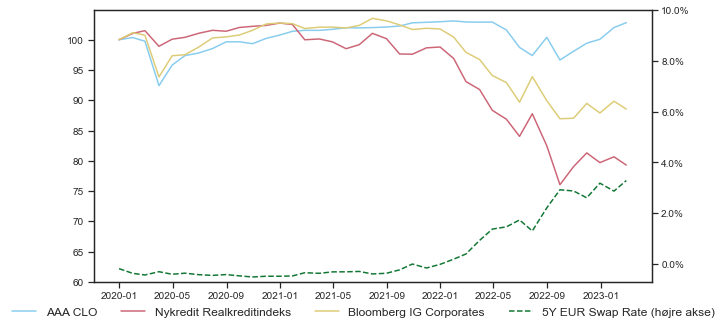

In [3]:
df_fig = pd.read_excel('data\historical_performance.xlsx')
df_fig.set_index('date', inplace=True)

fig, ax1 = plt.subplots(1,1, figsize=(10,5))
ax2 = ax1.twinx() # second y-axis

# plotting on the left axis
ax1.plot(df_fig['CLO_AAA'], label='AAA CLO');
ax1.plot(df_fig['nykredit'], label='Nykredit Realkreditindeks');
ax1.plot(df_fig['bloomberg'], label='Bloomberg IG Corporates');

# plotting on the right axis
ax2._get_lines.prop_cycler = ax1._get_lines.prop_cycler
ax2.plot(df_fig['eur_swap'], label='5Y EUR Swap Rate (højre akse)', linestyle='--')

# additional cosmetics
ax1.set_ylim(bottom=60)
ax2.set_ylim(top=0.10)
ax2.yaxis.set_major_formatter(FuncFormatter('{:.1%}'.format))
fig.legend(loc='lower center', frameon=False, ncol=len(df_fig));
# plt.savefig('figures/yields_and_interest', dpi=300, bbox_inches='tight')

## Figure 3: Illustrativ simulering af en Geometric Brownian Motion

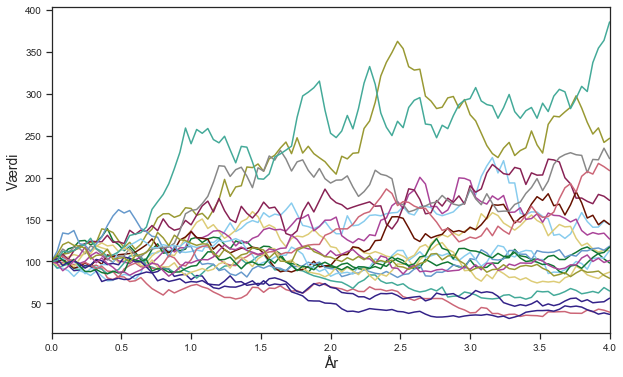

In [4]:
sim_model = model.CLOModel(T=4, n=20) # model instance
time = np.linspace(0, sim_model.T, sim_model.m+1) # time with freq+1 steps
tt = np.full(shape=(sim_model.n, sim_model.m+1), fill_value = time).T
sim_array = sim_model.GBM_fig()

# Plotting
fig, ax = plt.subplots(1,1, figsize=(10,6))
ax.plot(tt, sim_array);
ax.set_xlim(0, sim_model.T)
ax.set_xlabel('År');
ax.set_ylabel('Værdi');
# plt.savefig('figures/GBM_simulation', dpi=300, bbox_inches='tight')

## Figur 4: Simuleret fordeling af cashflow til SPV

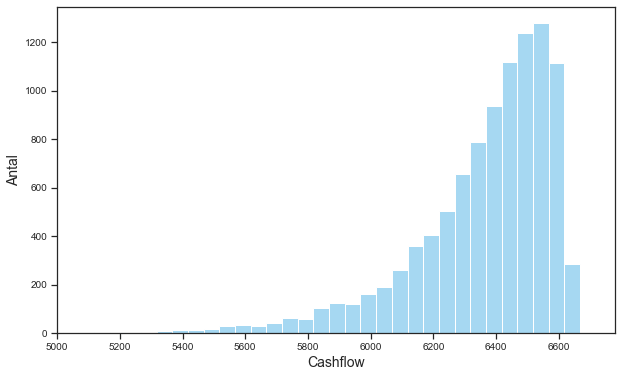

In [5]:
fig_model = model.CLOModel()
data = fig_model.SPV_value()

fig, ax = plt.subplots(1,1, figsize=(10,6))

sns.histplot(data, binwidth=50)
ax.set_xlabel('Cashflow')
ax.set_ylabel('Antal')
ax.set_xlim(left=5000);

# plt.savefig('figures/SPV_cashflow', dpi=300, bbox_inches='tight')

## Figur 5: Fordeling af cashflow til SPV'en under forskellige risikofrie rentesatser

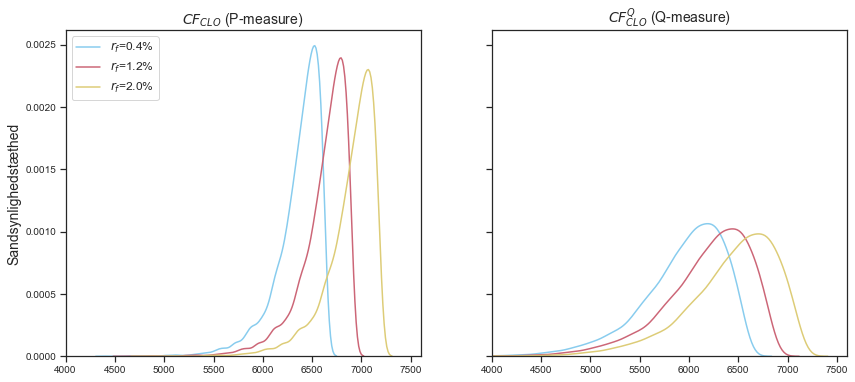

In [6]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14,6), sharey=True)
rf_array = np.array([0.004, 0.012, 0.02]) # risk free rates

for rate in rf_array:
    fig_model = model.CLOModel(rf=rate)
    SPV_P = fig_model.SPV_value()
    SPV_Q = fig_model.SPV_value(risk_neutral=True)
    sns.kdeplot(SPV_P, ax=ax1, label=f'$r_f$={rate*100}%') # left axis (P-measure)
    sns.kdeplot(SPV_Q, ax=ax2) # right axis (Q-measure)
    # sns.histplot(SPV_P, ax=ax1, label=f'$r_f$={rate*100}%', alpha=0.5)
    # sns.histplot(SPV_Q, ax=ax2, alpha=0.5)
    
ax1.legend()
ax1.set_xlim(left=4000, right=7600)
ax2.set_xlim(left=4000, right=7600)
ax1.set_title('$CF_{CLO}$ (P-measure)')
ax2.set_title('$CF_{CLO}^Q$ (Q-measure)')
ax1.set_ylabel('Sandsynlighedstæthed');

# plt.savefig('figures/SPV_cashflow_rf', dpi=300, bbox_inches='tight')

## Figur 6: Renstestigningers effekt på spreads

Text(0.5, 0, 'Risikofri rente')

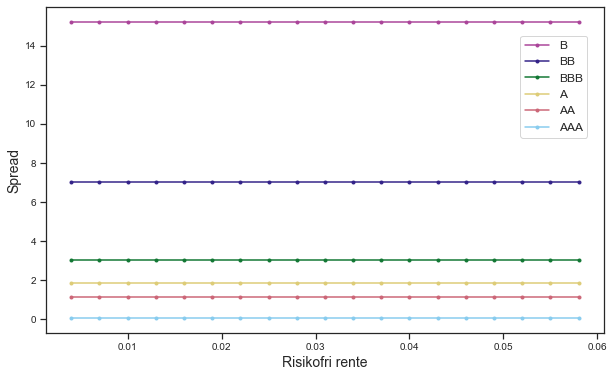

In [7]:
rf_array = np.arange(0.004, 0.06, 0.003)

data_agg = []
for rate in rf_array:
    fig_model = model.CLOModel(rf=rate)
    result_table = fig_model.result_table()
    data_agg.append(result_table['spread'].to_list())
    
data_agg = np.array(data_agg)

fig, ax = plt.subplots(1,1, figsize=(10,6))

for i, rating in enumerate(['AAA', 'AA', 'A', 'BBB', 'BB', 'B']):
    ax.plot(rf_array, data_agg[:,i], marker='.', label=f'{rating}')
    
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], frameon=True, loc=(0.85, 0.6))
ax.set_ylabel('Spread')
ax.set_xlabel('Risikofri rente')

# plt.savefig('figures/spread_rf_sensitivity', dpi=300, bbox_inches='tight')

## Figur 7: Fordeling af cashflow til CLO'en under forskellige konkursrisici

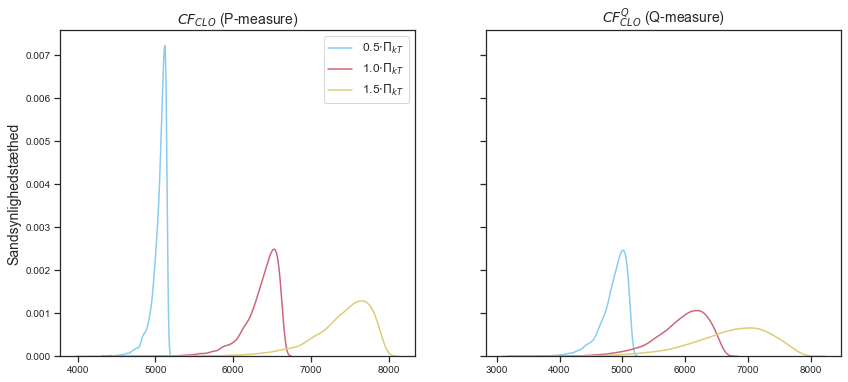

In [8]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14,6), sharey=True)
scalar_array = np.array([0.5, 1, 1.5]) # risk free rates
base_default = model.CLOModel().load_default() # load baseline default rates

for scalar in scalar_array:
    fig_model = model.CLOModel(default=base_default*scalar)
    SPV_P = fig_model.SPV_value()
    SPV_Q = fig_model.SPV_value(risk_neutral=True)
    sns.kdeplot(SPV_P, ax=ax1, label=f'{scalar}'+'$\cdot \Pi_{kT}$') # left axis (P-measure)
    sns.kdeplot(SPV_Q, ax=ax2) # right axis (Q-measure)
    # sns.histplot(SPV_P, ax=ax1, label=f'$r_f$={rate*100}%', alpha=0.5)
    # sns.histplot(SPV_Q, ax=ax2, alpha=0.5)
    
ax1.legend()
# ax1.set_xlim(left=4000, right=7600)
# ax2.set_xlim(left=4000, right=7600)
ax1.set_title('$CF_{CLO}$ (P-measure)')
ax2.set_title('$CF_{CLO}^Q$ (Q-measure)')
ax1.set_ylabel('Sandsynlighedstæthed');

# plt.savefig('figures/SPV_cashflow_default', dpi=300, bbox_inches='tight')

## Figur 8: Effekten af ændringer i konkursrici på spreads

In [9]:
scalar_array = np.arange(0.5, 2, 0.08)

data_spread = []
data_kurs = []

base_default = model.CLOModel().load_default() # load baseline default rates

for scalar in scalar_array:
    fig_model = model.CLOModel(default=base_default*scalar)
    result_table = fig_model.result_table()
    data_spread.append(result_table['spread'].to_list())
    data_kurs.append(result_table['kurs'].to_list())
    
data_spread = np.array(data_spread)
data_kurs = np.array(data_kurs)

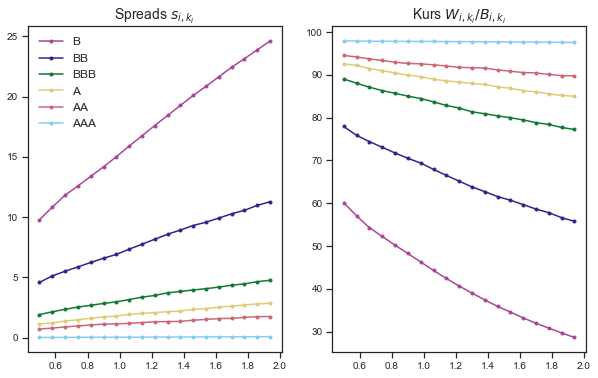

In [10]:
fig, ax = plt.subplots(1,2, figsize=(10,6))

for i, rating in enumerate(['AAA', 'AA', 'A', 'BBB', 'BB', 'B']):
    ax[0].plot(scalar_array, data_spread[:,i], marker='.', label=f'{rating}')
    ax[1].plot(scalar_array, data_kurs[:,i], marker='.')
    
handles, labels = ax[0].get_legend_handles_labels()
ax[0].legend(handles[::-1], labels[::-1], frameon=False)

# ax[0].set_xticks(rf_array)
# ax[1].set_xticks(rf_array)

ax[0].set_title('Spreads $s_{i,k_i}$')
ax[1].set_title('Kurs $W_{i,k_i}/B_{i,k_i}$');

# plt.savefig('figures/spread_default_sensitivity', dpi=300, bbox_inches='tight')

## Table 3: Resultater fra modelsimulering

In [11]:
fig_model = model.CLOModel()
table = fig_model.result_table()

In [12]:
table.round(2)

default probability  aggregate face value  aggregate market value  \
Rating                                                                      
AAA                    0.09               5018.73                 4908.53   
AA                     0.30               5279.62                 5149.78   
A                      0.44               5356.81                 5218.77   
BBB                    1.48               5612.34                 5434.03   
BB                     6.19               5934.59                 5656.31   
B                     16.67               6167.18                 5762.83   

        face value  market value   kurs  afkast  spread  
Rating                                                   
AAA        5018.73       4908.53  97.80    0.44    0.04  
AA          260.88        241.24  92.47    1.57    1.17  
A            77.20         68.99  89.37    2.25    1.85  
BBB         255.53        215.26  84.24    3.43    3.03  
BB          322.25        222.28  68.98    7.43    7.03  
B           232.59        106.52  45.80   15.62   15.22

In [13]:
base_table = model.CLOModel().result_table()

risk_model = model.CLOModel()
risk_model.default = risk_model.default * 1.5
risk_table = risk_model.result_table()


In [14]:
risk_table

default probability  aggregate face value  aggregate market value  \
Rating                                                                      
AAA                  0.1377           5510.157709             5382.733123   
AA                   0.4500           5863.491050             5704.253476   
A                    0.6600           5967.698034             5794.990435   
BBB                  2.2200           6348.197003             6100.238857   
BB                   9.2850           6842.803539             6402.661703   
B                   25.0050           7204.151274             6530.059000   

         face value  market value       kurs     afkast     spread  
Rating                                                              
AAA     5510.157709   5382.733123  97.687460   0.467940   0.067940  
AA       353.333341    321.520354  90.996324   1.887021   1.487021  
A        104.206984     90.736959  87.073779   2.768288   2.368288  
BBB      380.498969    305.248422  80.223193   4.407150   4.007150  
BB       494.606536    302.422846  61.144126   9.838728   9.438728  
B        361.347735    127.397297  35.256149  20.850605  20.450605